In [13]:
import numpy as np

from skimage import io, transform
from SIMulator_functions import *
import glob
import os
import argparse
import matplotlib.pyplot as plt

In [14]:
# ------------ Parameters-------------
def GetParams():
    opt = argparse.Namespace()

    # phase shifts for each stripe
    opt.Nshifts = 3
    # number of orientations of stripes
    opt.Nangles = 3
    # modulation factor
    opt.ModFac = 0.3+0.4*np.random.rand()
    # orientation offset
    opt.alpha = pi/3*(np.random.rand()-0.5)
    # orientation error
    opt.angleError = 10*pi/180*(np.random.rand()-0.5)
    # shuffle the order of orientations
    opt.shuffleOrientations = False
    # random phase shift errors
    opt.phaseError = 1*pi*(0.5-np.random.rand(opt.Nangles, opt.Nshifts))
    # in percentage
    opt.NoiseLevel = 18 + 8*(np.random.rand()-0.5)
    # Poisson noise extent
    opt.Poisson = np.random.randint(10000,50000)
    # include OTF and GT in stack
    opt.OTF_and_GT = True
    # NA
    opt.NA = 1.2
    # Emission wavelength
    opt.emission = np.random.randint(500,680)
    # Pattern frequency  
    kMax = (2*opt.NA)/(opt.emission)
    opt.k2 = 0.6*(kMax)
    # Pixel Size
    # To maintain niquist these pixels have been halved. SIM images must be upsampled before reconstion
    opt.Psize = np.random.randint(84,110)
    # Image to use for ground truth in training
    opt.target = 'sim' # 'original' or 'sim' 
    
    return opt


In [15]:
# ------------ Options --------------
nrep = 3

sLoc = "E:/Users/ew535/Training datasets/Trained sets/16-06-2020/"
files = glob.glob('D:/User/Edward/Documents/GitHub/ML-SIM/Data generation/*.png')
files[0]

'D:/User/Edward/Documents/GitHub/ML-SIM/Data generation\\0001.png'

1404


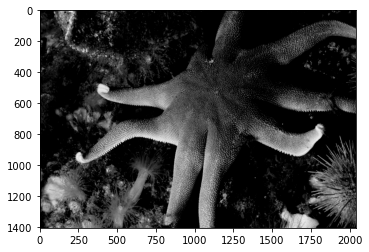

In [16]:
Io = io.imread(files[0]) / 255
Io = Io - 0.3*np.amax(Io)
Io[Io<0] = 0
print(np.amin(Io[:,:,0].shape))
plt.imshow(Io[:,:,0],cmap = 'gray')

In [17]:
n_rep = 1
sNum = 1
for n_it in range(n_rep):
    # I think there was an nRep loop here to go through the data set multiple times
    # ------------ Main loop --------------
    for file in files:
        Io = io.imread(file) 
        Io = Io / np.amax(Io)
        Io = Io - 0.3 # Cropping LUT like this increases the number of sharp details in the image 
        Io[Io<0] = 0
        Io = Io/np.amax(Io)
        
        minDim = np.amin(Io[:,:,0].shape)
        # This is a very ugly way of re-sampling regions of the image
        if (n_it % 2) ==0:
            Io = Io[0:minDim,0:minDim,:]
           
        else:
            Io = np.rot90(Io,2)
            Io = Io[0:minDim,0:minDim,:]
            
        Io = transform.resize(Io, (1024, 1024), anti_aliasing=True)
        
        if np.random.rand(1) > 0.65: # 35 percent of the time use the same image for background light

            # Use same image
            Oi = Io[:,:,np.random.randint(1,3)]  # if not grayscale
            Oi = transform.resize(Oi, (512, 512), anti_aliasing=True)
            Io = Io[:,:,0]

        else:
            # Use another image
            if  Io.shape[2] > 1:
                Io = Io.mean(2)

            fnew = files[np.random.randint(0, len(files))]
            Oi = io.imread(fnew) 
            Oi = Oi / np.amax(Oi)
            Oi = Oi - 0.3
            Oi[Oi<0] = 0

            minDim = np.amin(Oi[:,:,0].shape)
            Oi = Oi[0:minDim-1,0:minDim-1,:]
            Oi = transform.resize(Oi, (512, 512), anti_aliasing=True)

            if  Oi.shape[2] > 1: # if not grayscale
                Oi = Oi.mean(2)  
                Oi = Oi/np.amax(Oi)

        Io = np.rot90(Io,n_it)
        Oi = np.rot90(Oi,n_it)
        opt = GetParams()
        stack = Generate_SIM_Image(opt, Io, Oi)

        # normalise
        for i in range(len(stack)):
            stack[i] = (stack[i] - np.min(stack[i])) / \
                (np.max(stack[i]) - np.min(stack[i]))

        stack = (stack * 255).astype('uint8')

        svPath = str(sNum)+".tif"
        io.imsave(svPath,stack)
        
        if np.remainder(sNum,20) == 0:        
            print('Done image',sNum, '/', n_rep*len(files))
            
        sNum += 1




angle shift =  -0.44027677941498233
kx =  -45
angle shift =  1.654118322978213
kx =  105
angle shift =  3.7485134253714083
kx =  -60
angle shift =  0.15776268919240657
kx =  14
angle shift =  2.252157791585602
kx =  72
angle shift =  4.346552893978798
kx =  -87
angle shift =  -0.5933380229554102
kx =  -71
angle shift =  1.501057079437785
kx =  126
angle shift =  3.5954521818309804
kx =  -55
angle shift =  -0.43504619020671237
kx =  -53
angle shift =  1.6593489121864828
kx =  127
angle shift =  3.753744014579678
kx =  -73
angle shift =  -0.4053226955447764
kx =  -42
angle shift =  1.6890724068484189
kx =  107
angle shift =  3.783467509241614
kx =  -64
angle shift =  0.5407877007690991
kx =  56
angle shift =  2.6351828031622944
kx =  53
angle shift =  4.72957790555549
kx =  -110


In [18]:
opt.emission = 670
print('Kmax =  ',(512*opt.Psize*2*opt.NA)/(opt.emission))
print('Psize =  ',opt.Psize)
print('Emission = ',opt.emission)


Kmax =   185.2370149253731
Psize =   101
Emission =  670


0.6948051948051948

array([[0.45101746, 0.3578357 ],
       [0.28567953, 0.00872157]])

array([], shape=(1, 2, 0), dtype=float64)